In [23]:
# Imports
import numpy as np
import pandas as pd

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Customise our plotting settings
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from langdetect import detect_langs

import re
import nltk

# loading the data set

In [24]:
# Importing data from csv files using the read_csv() fuction in the pandas library

test= pd.read_csv('data/test_with_no_labels.csv')
train= pd.read_csv('data/train.csv')

In [25]:
train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


# language check

In [4]:
sentiment_values = list(train.sentiment.unique())
sentiment_values

[1, 2, 0, -1]

In [5]:
train["sentiment"].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

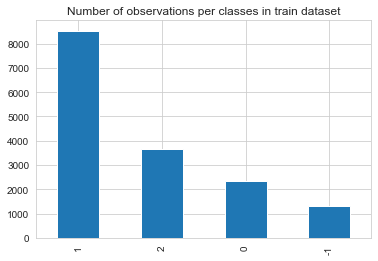

In [6]:
train.sentiment.value_counts().plot(kind='bar')
plt.title('Number of observations per classes in train dataset')
plt.show()

In [7]:
#datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


# Preprocessing the dataset 

In [19]:
#removing pattern in the input text
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt
    

In [20]:
train.head(10)

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor chief doesn think carbon dioxid m...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,rawstori research have three year climat chang...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wire pivot year climat chang ht...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,soynoviodetoda racist sexist climat chang deni...
5,1,Worth a read whether you do or don't believe i...,425577,worth read whether believ climat chang http gg...
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,thenat mike penc doesn believ global warm that...
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,makeandmendlif thing today fight climat chang ...
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,aceofspadeshq nephew inconsol want like will p...
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,paigetweedi offens like just believ global warm


In [10]:
#remove twitter handle @users
train["clean_tweet"]=np.vectorize(remove_pattern)(train["message"],"@[\W]*")

In [18]:
train.head(10)

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor chief doesn think carbon dioxid m...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,rawstori research have three year climat chang...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wire pivot year climat chang ht...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,soynoviodetoda racist sexist climat chang deni...
5,1,Worth a read whether you do or don't believe i...,425577,worth read whether believ climat chang http gg...
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,thenat mike penc doesn believ global warm that...
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,makeandmendlif thing today fight climat chang ...
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,aceofspadeshq nephew inconsol want like will p...
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,paigetweedi offens like just believ global warm


In [12]:
#remove special characters and punctuations
train["clean_tweet"]=train["message"].str.replace("[^a-zA-Z#]"," ")
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn t think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,It s not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,RT RawStory Researchers say we have three ye...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,RT SoyNovioDeTodas It s and a racist ...


In [13]:
train["clean_tweet"]=train["clean_tweet"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
train.head(10)


,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor chief doesn think carbon dioxide ...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,RawStory Researchers have three years climate ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED pivotal year climate chan...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,SoyNovioDeTodas racist sexist climate change d...
5,1,Worth a read whether you do or don't believe i...,425577,Worth read whether believe climate change http...
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,thenation Mike Pence doesn believe global warm...
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,makeandmendlife things today fight climate cha...
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,AceofSpadesHQ nephew inconsolable wants like w...
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,paigetweedy offense like just believe global w...


In [14]:
#individual words considered as token
tokenized_tweet=train["clean_tweet"].apply(lambda x:x.split())
tokenized_tweet.head()

0    [PolySciMajor, chief, doesn, think, carbon, di...
1    [like, lack, evidence, anthropogenic, global, ...
2    [RawStory, Researchers, have, three, years, cl...
3    [#TodayinMaker#, WIRED, pivotal, year, climate...
4    [SoyNovioDeTodas, racist, sexist, climate, cha...
Name: clean_tweet, dtype: object

In [15]:
#stem the words
from nltk .stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [polyscimajor, chief, doesn, think, carbon, di...
1        [like, lack, evid, anthropogen, global, warm]
2    [rawstori, research, have, three, year, climat...
3    [#todayinmaker#, wire, pivot, year, climat, ch...
4    [soynoviodetoda, racist, sexist, climat, chang...
Name: clean_tweet, dtype: object

In [16]:
#combine into a single string or sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join( tokenized_tweet[i])
    
train["clean_tweet"]= tokenized_tweet
train.head()

,sentiment,message,tweetid,clean_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor chief doesn think carbon dioxid m...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,rawstori research have three year climat chang...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#todayinmaker# wire pivot year climat chang ht...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,soynoviodetoda racist sexist climat chang deni...


In [ ]:
languages

# Exploratory Data Analysis

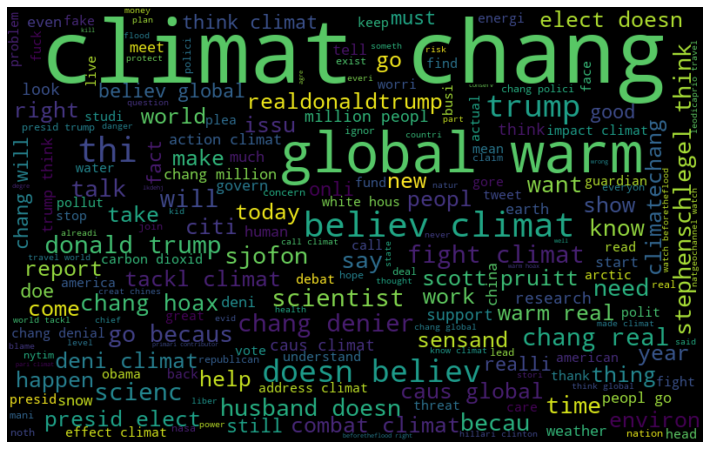

In [17]:
#visualize the frequent words
all_word = " ".join([sentence for sentence in train["clean_tweet"]])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_word)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()



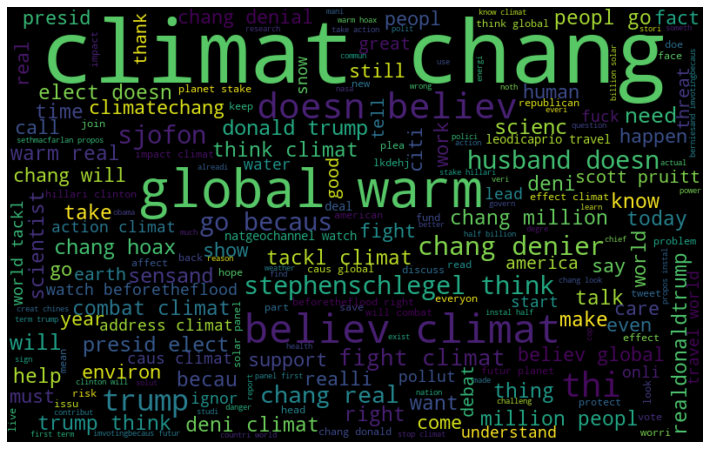

In [18]:
#frequent words visualization for +Ve
#visualize the frequent words
all_word = " ".join([sentence for sentence in train["clean_tweet"] [train["sentiment"]==1]])


wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_word)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()



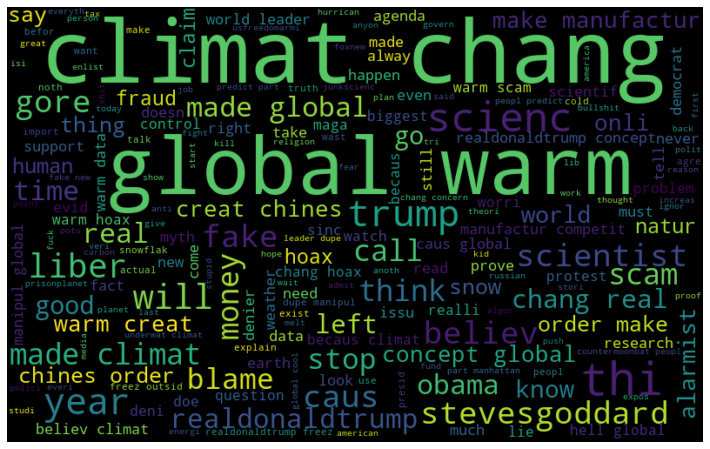

In [20]:
#frequent words visualization for +Ve
#visualize the frequent words
all_word = " ".join([sentence for sentence in train["clean_tweet"] [train["sentiment"]==-1]])


wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_word)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()



In [23]:
#EXTRACT HASTAGS
def hashtag_extact(tweets):
    hashtags=[]
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [48]:
#extract hashtags from no1
ht_positive1=hashtag_extact(train["clean_tweet"][train[ "sentiment"] ==1])
#extract hashtags from no2
ht_positive2=hashtag_extact(train["clean_tweet"][train[ "sentiment"] ==2])
#extract hashtags from no3
ht_positive0=hashtag_extact(train["clean_tweet"][train[ "sentiment"] ==0])
#extract hashtags from no4
ht_positiveNeg=hashtag_extact(train["clean_tweet"][train[ "sentiment"] ==-1])


In [49]:
ht_positive1

[[],
 [],
 ['todayinmaker'],
 ['electionnight'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['climatemarch'],
 [],
 [],
 [],
 [],
 ['saveourplanet'],
 ['cop', 'earthtomarrakech'],
 ['climat'],
 ['obamaunc'],
 [],
 ['cdnpoli'],
 ['johnholdren'],
 ['demforc', 'theresist', 'uniteblu'],
 [],
 [],
 ['imvotingbecaus'],
 [],
 [],
 ['womansmarch'],
 [],
 ['resist', 'impeach'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['beforetheflood'],
 [],
 [],
 [],
 ['srhpl'],
 [],
 [],
 ['climat', 'fishermen'],
 [],
 [],
 [],
 [],
 ['earthday', 'marchforsci', 'healthandclim'],
 [],
 [],
 [],
 [],
 ['beforetheflood'],
 ['worldveganday'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['avhack'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['art', 'larsenc', 'climatechangeart'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['sdg', 'climat'],
 [],
 [],
 [],
 ['exxonknew'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['exxonknew'],
 [],
 ['hrc', 'ch

In [50]:
#unnest list
ht_positive1=sum(ht_positive1,[])
ht_positive2=sum(ht_positive2,[])
ht_positive0=sum(ht_positive0,[])
ht_positiveNeg=sum(ht_positiveNeg,[])

In [52]:
ht_positive0[:5]

['qanda', 'coag', 'airqual', 'climatechang', 'greenhousega']

In [53]:
freq=nltk.FreqDist(ht_positive1)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                 "Count":list(freq.values())})
d.head()

,Hashtag,Count
0,todayinmaker,1
1,electionnight,10
2,climatemarch,13
3,saveourplanet,1
4,cop,71


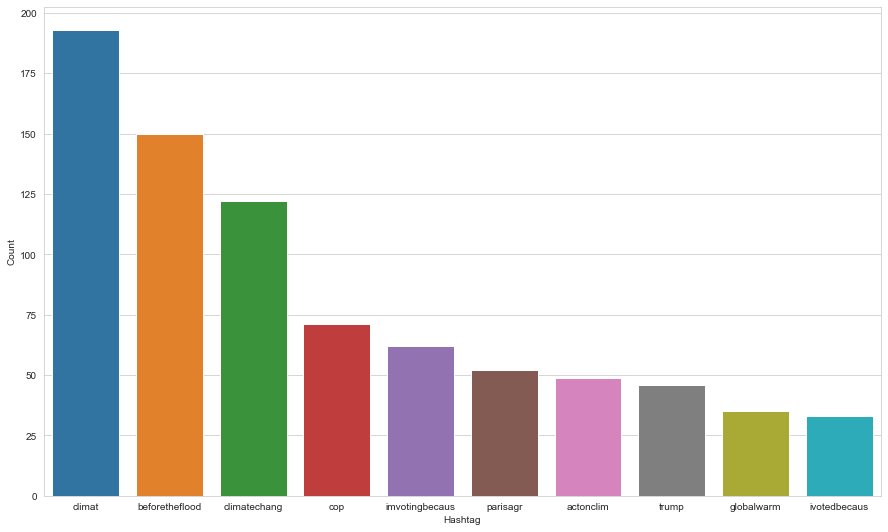

In [54]:
#select top 10 hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [55]:
#for 2
freq=nltk.FreqDist(ht_positive2)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                 "Count":list(freq.values())})
d.head()

,Hashtag,Count
0,climat,140
1,climatechang,66
2,skpol,1
3,parisagr,9
4,environ,49


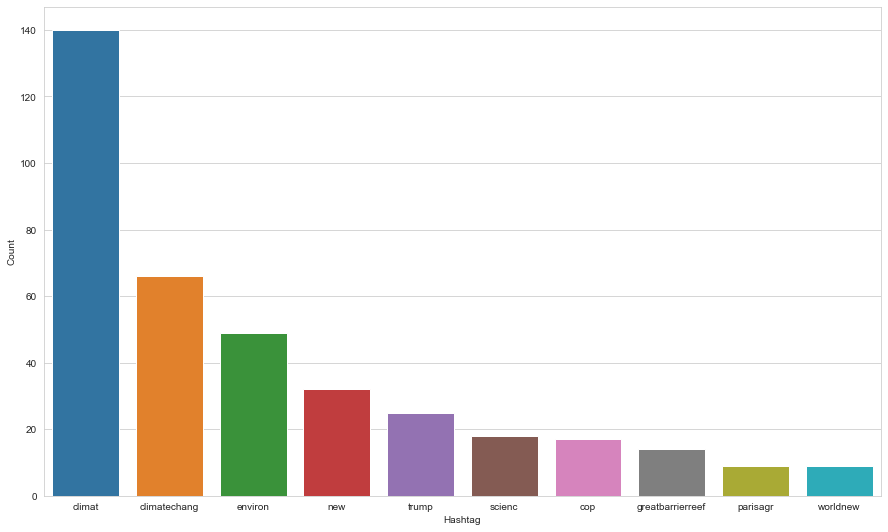

In [56]:
#select top 10 hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [57]:
#for 2
freq=nltk.FreqDist(ht_positiveNeg)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                 "Count":list(freq.values())})
d.head()

,Hashtag,Count
0,nomorescam,1
1,nomoredemocrat,1
2,draintheswamp,2
3,fakenew,4
4,myth,1


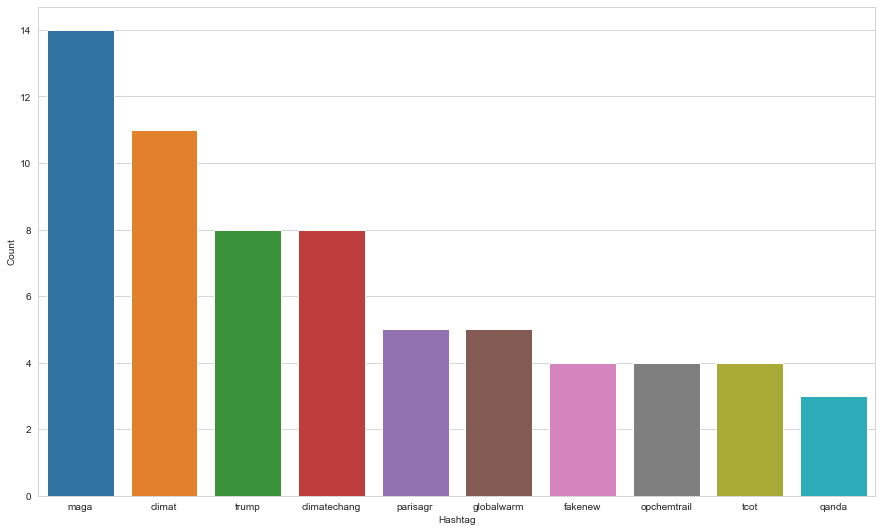

In [58]:
#select top 10 hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [59]:
#for 2
freq=nltk.FreqDist(ht_positive0)
d=pd.DataFrame({'Hashtag':list(freq.keys()),
                 "Count":list(freq.values())})
d.head()

,Hashtag,Count
0,qanda,4
1,coag,1
2,airqual,1
3,climatechang,16
4,greenhousega,1


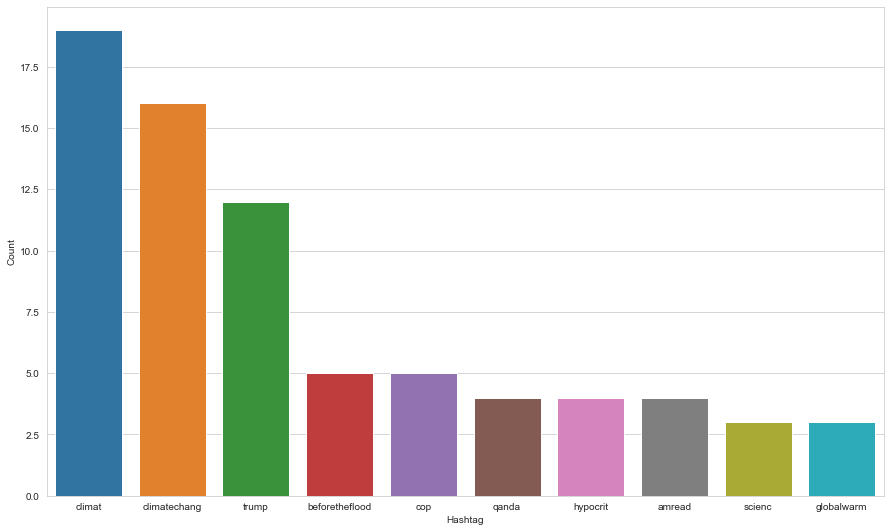

In [60]:
#select top 10 hashtags
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

# input split

In [72]:
#feature extraction 
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer =CountVectorizer(max_df=0.90 ,min_df=2,max_features=1000,stop_words="english")
bow=bow_vectorizer.fit_transform(train["clean_tweet"])

In [73]:
#bow[0].toarray()

In [74]:
pd.DataFrame(bow.toarray(),columns=bow_vectorizer.get_feature_names())

,abandon,abort,absolut,acceler,accept,accord,account,acknowledg,act,action,...,wrong,wrote,yeah,year,yearsofliv,yesterday,york,young,youtub,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#spliting the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, train["sentiment"], test_size=0.2, random_state=42)

# Model Training 

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score

In [80]:
#training 
model = LogisticRegression(multi_class='ovr',C=90)
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

LogisticRegression(C=90, multi_class='ovr')

In [81]:
#testing
pred=model.predict(x_test)

In [83]:
print(classification_report(y_test, pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.55      0.39      0.45       278
           0       0.47      0.45      0.46       425
           1       0.76      0.79      0.77      1755
           2       0.69      0.73      0.71       706

    accuracy                           0.69      3164
   macro avg       0.62      0.59      0.60      3164
weighted avg       0.69      0.69      0.69      3164



In [85]:
X_count_t = bow_vectorizer.fit_transform(test['message'].values.astype(str))

In [86]:
y_pred_t = model.predict(X_count_t)

In [87]:
submission = pd.DataFrame({
    'tweetid': test.tweetid,
    'sentiment': y_pred_t
})

In [88]:
submission.to_csv('submission.csv', index=False)